## Postprocessing and plotting blocking detected in:
### IFS/ICON with the TM2D ABS / ANOM methods
### We compute seansonal frequency

In [1]:
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys

## Let's create the seasonal and annual frequency mean and save it in a netCDF file

## Staring with reversal index

In [4]:
###==icon blocks in ngc2013
blocks_sims = xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ABS_Z500/blocking.nc')
blocks_sims

<xarray.Dataset> Size: 6GB
Dimensions:   (lon: 360, lat: 181, time: 10957)
Coordinates:
  * lon       (lon) int64 3kB 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * lat       (lat) int64 1kB -90 -89 -88 -87 -86 -85 -84 ... 85 86 87 88 89 90
  * time      (time) datetime64[ns] 88kB 2020-01-02 2020-01-03 ... 2049-12-31
Data variables:
    Blocking  (time, lat, lon) int64 6GB ...

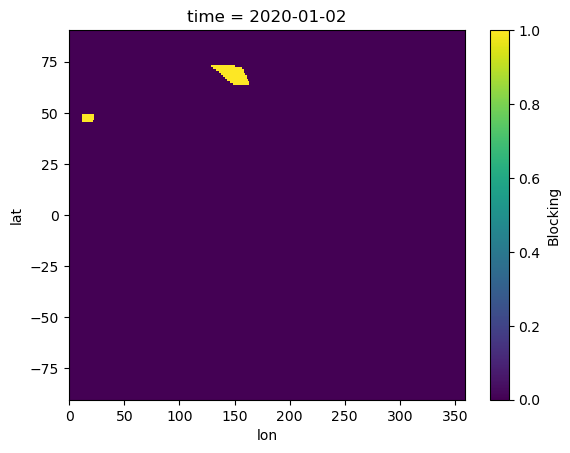

In [5]:
blocks_sims.Blocking[0,...].plot()

In [6]:
##Get simulations coordinates to regrid ERA
sims_lon=blocks_sims.lon
sims_lat=blocks_sims.lat

In [4]:
#sims_lon

In [5]:
#sims_lat

In [9]:
### accumulate ngc2003
ntime_sims = len(blocks_sims.time)
acc_sims = blocks_sims.Blocking.sum(dim='time')/ntime_sims*100
acc_sims

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [10]:
###Saving mean frequency as netcdf
#acc_sims.to_netcdf('/work/bm1235/b382006/era5/block/ABS_Z500/ABS_Z500/Feq_BLOCKS-icon-ngc2013.nc')

In [13]:
#icon2=xr.open_dataset('Feq_BLOCKS-icon-ngc2013.nc')
#icon2.Blocking.plot()

In [8]:
###BY SEASON

sufix='SON'

if sufix == 'DJF': 
    season = [1,2,12] # winter
if sufix == 'MAM': 
    season = [3,4,5] # spring
if sufix == 'JJA': 
    season = [6,7,8] # summer
if sufix == 'SON': 
    season = [9,10,11] # winter

blocks_sims_sea = blocks_sims.sel(time=blocks_sims.time.dt.month.isin(season))
ntime_sims_sea = len(blocks_sims_sea.time)
acc_sims_sea = blocks_sims_sea.Blocking.sum(dim='time')/ntime_sims_sea*100
#acc_sims_sea

#full_icon2_son = full_icon2.sel(time=full_icon2.time.dt.month.isin([9,10,11]))
#ntime_icon2_son = len(full_icon2_son.time)
#acc_icon2_son = full_icon2_son.Blocking.sum(dim='time')/ntime_icon2_son*100

In [9]:
###Save season as netcdf
acc_sims_sea.to_netcdf('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'.nc')

In [35]:
###Remove variables 
import gc
#del blocks_sims
#del blocks_sims_sea
gc.collect()

0

### REANALYSIS ERA5

In [7]:
###==ERA5
### == brunner
#blocks_era5= xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5-.nc')
### == Davini
blocks_era5= xr.open_mfdataset('/scratch/b/b382006/obs/era5/block/ABS_500_DAV/block_ABS-Z500*')

In [8]:
###==rename
blocks_era5=blocks_era5.rename({'longitude':'lon',
                       'latitude':'lat'
                       })
###===lon to 0 to 359
blocks_era5['lon']=blocks_era5['lon']+180
blocks_era5=blocks_era5.roll(lon=180)
blocks_era5

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 5113, lat: 181, lon: 360)
Coordinates:
  * lon       (lon) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * time      (time) datetime64[ns] 41kB 1990-01-01 1990-01-02 ... 2003-12-31
Data variables:
    Blocking  (time, lat, lon) int64 3GB dask.array<chunksize=(365, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-14 14:59:19 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
ntime_era5 = len(blocks_era5.time)
acc_era5 = blocks_era5.Blocking.sum(dim='time')/ntime_era5*100

In [10]:
#sims_lat

In [11]:
new_lon=sims_lon
new_lat=sims_lat
acc_era5_reg=acc_era5.interp(lon=new_lon,lat=new_lat)

In [12]:
acc_era5_reg

<xarray.DataArray 'Blocking' (lat: 181, lon: 360)> Size: 521kB
dask.array<transpose, shape=(181, 360), dtype=float64, chunksize=(181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 1kB -90 -89 -88 -87 -86 -85 -84 ... 85 86 87 88 89 90

In [13]:
#acc_era5_reg.to_netcdf('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5.nc')

In [23]:
###BY SEASON

sufix='SON'

if sufix == 'DJF': 
    season = [1,2,12] # winter
if sufix == 'MAM': 
    season = [3,4,5] # spring
if sufix == 'JJA': 
    season = [6,7,8] # summer
if sufix == 'SON': 
    season = [9,10,11] # winter

blocks_era5_sea = blocks_era5.sel(time=blocks_era5.time.dt.month.isin(season))
ntime_era5_sea = len(blocks_era5_sea.time)
acc_era5_sea = blocks_era5_sea.Blocking.sum(dim='time')/ntime_era5_sea*100
acc_era5_sea

#full_icon2_son = full_icon2.sel(time=full_icon2.time.dt.month.isin([9,10,11]))
#ntime_icon2_son = len(full_icon2_son.time)
#acc_icon2_son = full_icon2_son.Blocking.sum(dim='time')/ntime_icon2_son*100

<xarray.DataArray 'Blocking' (lat: 181, lon: 360)> Size: 521kB
dask.array<mul, shape=(181, 360), dtype=float64, chunksize=(181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0

In [24]:
new_lon=sims_lon
new_lat=sims_lat
acc_era5_sea_reg=acc_era5_sea.interp(lon=new_lon,lat=new_lat)

In [25]:
###Save season as netcdf
acc_era5_sea_reg.to_netcdf('/scratch/b/b382006/obs/era5/block/ABS_500_DAV/Feq_BLOCKS-era5_'+sufix+'.nc')

### CMIP6 models

In [15]:
###==Loading
model='MIROC6'
ens=['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1','r4i1p1f1', 'r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1']
inpath='/scratch/b/b382006/cmip6/'+model+'/'+ens[1]+'/block/ABS_500'
#inpath='/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/'+ens[0]+'/block/ABS_500'
blocks_cmip6= xr.open_mfdataset(inpath+'/block_ABS-Z500_*')
#blocks_cmip6

In [16]:
#/scratch/b/b382006/cmip6/MIROC6/r1i1p1f1/block/ABS_500
#inpath

In [17]:
###===lon to 0 to 359
blocks_cmip6['lon']=blocks_cmip6['lon']+180
blocks_cmip6=blocks_cmip6.roll(lon=180)
#blocks_cmip6

In [18]:
###BY SEASON

sufix='DJF'

if sufix == 'DJF': 
    season = [1,2,12] # winter
if sufix == 'MAM': 
    season = [3,4,5] # spring
if sufix == 'JJA': 
    season = [6,7,8] # summer
if sufix == 'SON': 
    season = [9,10,11] # winter

blocks_cmip6_sea = blocks_cmip6.sel(time=blocks_cmip6.time.dt.month.isin(season))
ntime_cmip6_sea = len(blocks_cmip6_sea.time)
acc_cmip6_sea = blocks_cmip6_sea.Blocking.sum(dim='time')/ntime_cmip6_sea*100


In [19]:
### loading coordinates to interpolate
feq_icon_ngc2013_DJF=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
sims_lon=feq_icon_ngc2013_DJF.lon
sims_lat=feq_icon_ngc2013_DJF.lat
###interpolate
new_lon=sims_lon
new_lat=sims_lat
acc_cmip6_sea_reg=acc_cmip6_sea.interp(lon=new_lon,lat=new_lat)
#acc_cmip6_sea_reg.plot()

In [24]:
import os
import sys

outpath='/work/bm1235/b382006/cmip6/'+model+'/'+ens[1]+'/block/ABS_500/'

if not os.path.exists(outpath):
    os.makedirs(outpath)

In [25]:
###Save season as netcdf
acc_cmip6_sea_reg.to_netcdf(outpath+'/Feq_BLOCKS-cmip6_'+sufix+'.nc')

In [26]:
outpath

'/work/bm1235/b382006/cmip6/MIROC6/r1i1p1f1/block/ABS_500/'

In [46]:
###Remove variables 
import gc
del blocks_era5
del ntime_era5
del acc_era5
del blocks_era5_sea
del ntime_era5_sea
del acc_era5_sea
gc.collect()

1342

### Load blocking frequency dected with TM2D method

In [24]:
feq_icon_ngc2013=xr.open_dataset('Feq_BLOCKS-icon-ngc2013.nc').load()
feq_era5=xr.open_dataset('Feq_BLOCKS-era5.nc').load()

In [25]:
feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_DJF.nc').load()
feq_era5_DJF=xr.open_dataset('Feq_BLOCKS-era5_DJF.nc').load()

feq_icon_ngc2013_MAM=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_MAM.nc').load()
feq_era5_MAM=xr.open_dataset('Feq_BLOCKS-era5_MAM.nc').load()

feq_icon_ngc2013_JJA=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_JJA.nc').load()
feq_era5_JJA=xr.open_dataset('Feq_BLOCKS-era5_JJA.nc').load()

feq_icon_ngc2013_SON=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_SON.nc').load()
feq_era5_SON=xr.open_dataset('Feq_BLOCKS-era5_SON.nc').load()

In [26]:
feq_icon_ngc2013_DJF
feq_era5_DJF

<xarray.Dataset>
Dimensions:   (lon: 360, lat: 180)
Coordinates:
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    Blocking  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [27]:
### Compute BIAS
bias_icon =  feq_icon_ngc2013 - feq_era5
bias_icon_DJF =  feq_icon_ngc2013_DJF - feq_era5_DJF 
bias_icon_MAM = feq_icon_ngc2013_MAM - feq_era5_MAM
bias_icon_JJA =feq_icon_ngc2013_JJA -  feq_era5_JJA
bias_icon_SON =  feq_icon_ngc2013_SON - feq_era5_SON
bias_icon_DJF.Blocking

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

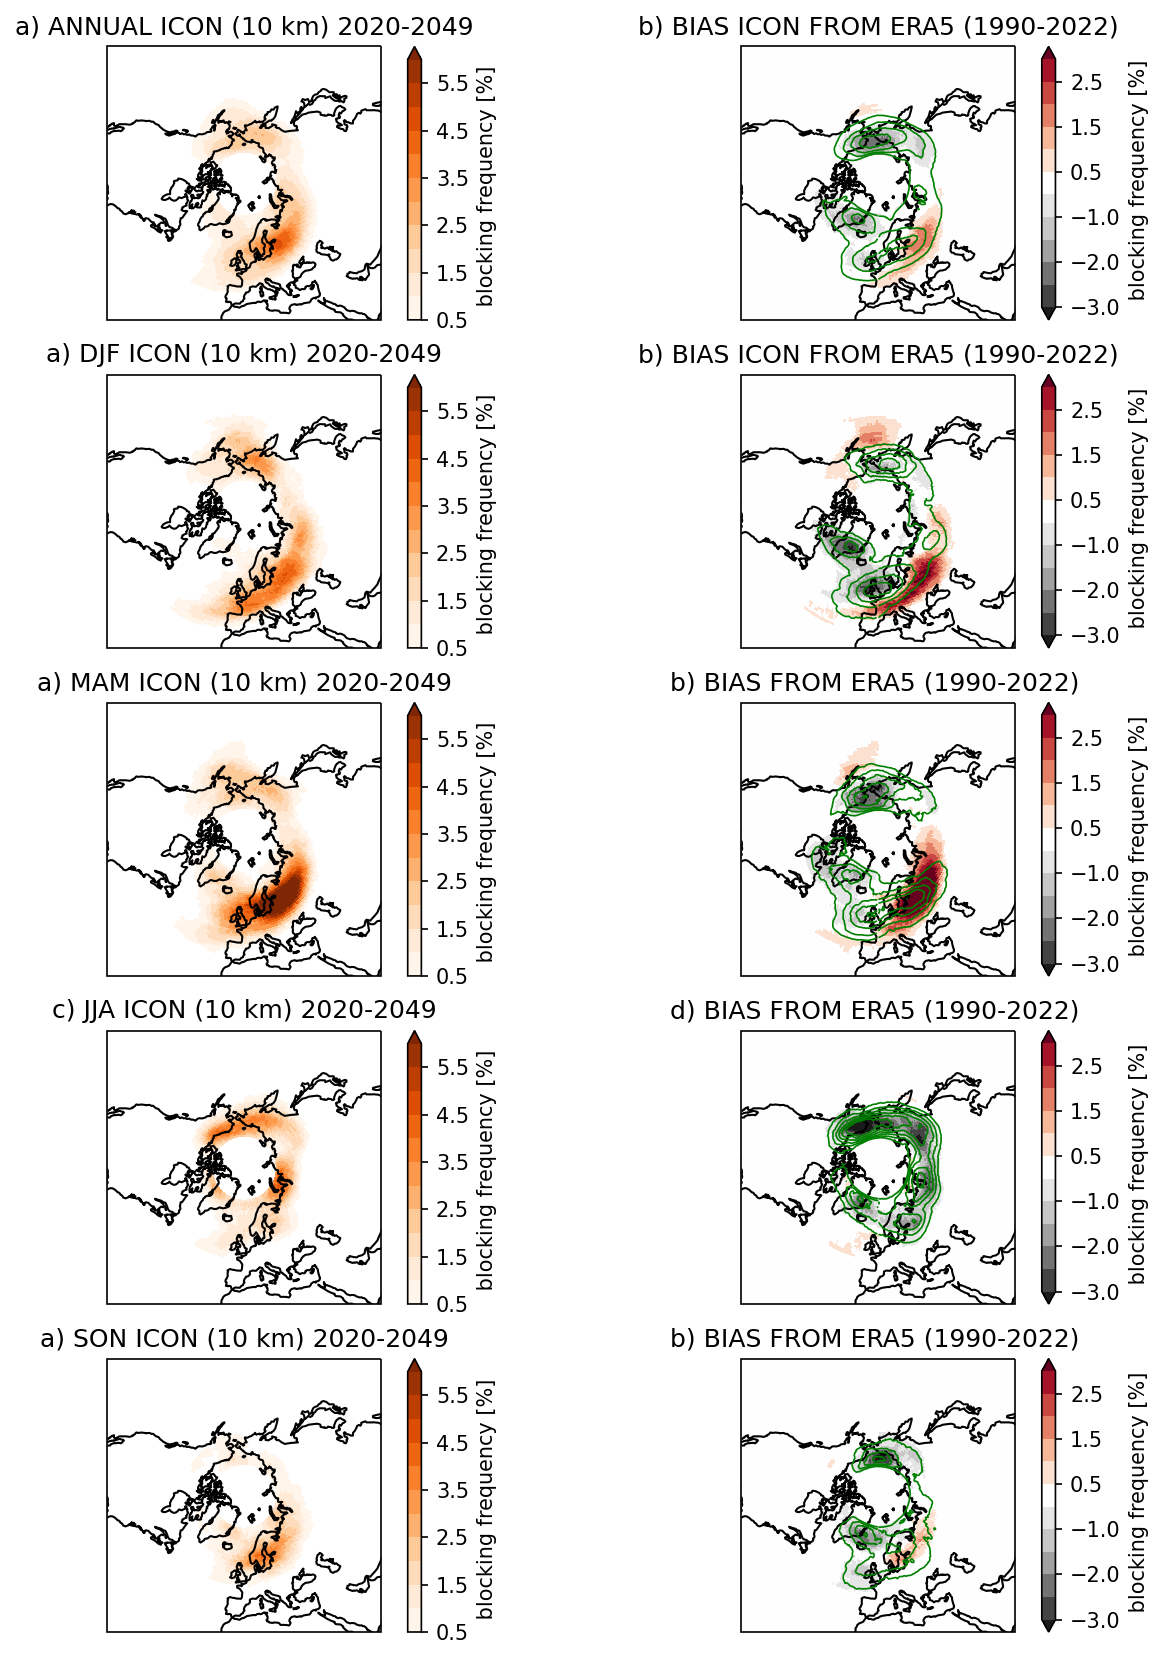

In [28]:
#BIAS model - era5
clevels=[-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3]
mlevels=np.arange(0.5,6.5,0.5)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5, 2, figsize=(10, 14),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im=feq_icon_ngc2013.Blocking.plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) ANNUAL ICON (10 km) 2020-2049')
#
###==== second panel
im=bias_icon.Blocking.plot(ax=ax2,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5.Blocking.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=np.arange(1,7,1), transform=ccrs.PlateCarree())
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b) BIAS FROM ERA5 (1990-2022)')


####==== third panel
im=feq_icon_ngc2013_DJF.Blocking.plot(ax=ax3,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('a) DJF ICON (10 km) 2020-2049')
#
#####==== fourth panel
im=bias_icon_DJF.Blocking.plot(ax=ax4,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF.Blocking.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=np.arange(1,7,1), transform=ccrs.PlateCarree())
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()                                                                                                                                                                                                                                                          
ax4.set_title('b) BIAS FROM ERA5 (1990-2022)')
#
####==== fifth panel
im=feq_icon_ngc2013_MAM.Blocking.plot(ax=ax5,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('a) MAM ICON (10 km) 2020-2049')
#
###==== sixth panel
im=bias_icon_MAM.Blocking.plot(ax=ax6,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM.Blocking.plot.contour(ax=ax6,colors='g', linewidths=0.8, levels=np.arange(1,7,1), transform=ccrs.PlateCarree())
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('b) BIAS FROM ERA5 (1990-2022) ')
#
####==== seveth panel
im=feq_icon_ngc2013_JJA.Blocking.plot(ax=ax7,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax7.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('c) JJA ICON (10 km) 2020-2049')
#
###==== eight panel
im=bias_icon_JJA.Blocking.plot(ax=ax8,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA.Blocking.plot.contour(ax=ax8,colors='g', linewidths=0.8, levels=np.arange(1,7,1), transform=ccrs.PlateCarree())
ax8.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('d) BIAS FROM ERA5 (1990-2022) ')
#
####==== niht panel
im=feq_icon_ngc2013_SON.Blocking.plot(ax=ax9,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax9.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax9.coastlines()
ax9.set_title('a) SON ICON (10 km) 2020-2049')
#
###==== tenth panel
im=bias_icon_SON.Blocking.plot(ax=ax10,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON.Blocking.plot.contour(ax=ax10,colors='g', linewidths=0.8, levels=np.arange(1,7,1), transform=ccrs.PlateCarree())
ax10.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax10.coastlines()
ax10.set_title('b) BIAS FROM ERA5 (1990-2022) ')


### Save
plt.savefig('bias_blocks_icon-ngc2013.jpg')

## Anom index

### icon ngc2013 by season

In [42]:
##ICON cycle 2 blockings
sufix="SON"
if sufix=="DJF":
    seas=[1,2,12]
if sufix=="MAM":
    seas=[3,4,5]
if sufix=="JJA":
    seas=[6,7,8]
if sufix=="SON":
    seas=[9,10,11]
    
blocks_icon=xr.open_mfdataset("/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/BLOCKS-icon-ngc2013-20*.nc")

# select only winter months January, February and December
#sufix='DJF'
blocks_sims = blocks_icon.sel(time=blocks_icon.time.dt.month.isin(seas))

ntime_sims=len(blocks_sims.time)

### accumulate ngc2013
ntime_sims =len(blocks_sims.time)
acc_sims = xr.where(blocks_sims['flag']>1,1,0).sum(dim='time')/ntime_sims*100



In [43]:
###Save season as netcdf
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc')

### ERA5 by season

In [11]:
##ICON cycle 2 blockings
sufix="JJA"
if sufix=="DJF":
    seas=[1,2,12]
if sufix=="MAM":
    seas=[3,4,5]
if sufix=="JJA":
    seas=[6,7,8]
if sufix=="SON":
    seas=[9,10,11]

###ERA5 dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/era5/block/ANO_Z500/BLOCKS-era5-ano_6h-*nc")
# select only winter months January, February and December
blocks_era = blocks.sel(time=blocks.time.dt.month.isin(seas))


###==rename
blocks_era=blocks_era.rename({'longitude':'lon',
                       'latitude':'lat'
                       })
###===lon to 0 to 359
blocks_era['lon']=blocks_era['lon']+180
blocks_era=blocks_era.roll(lon=180)

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [12]:
##Frequency
ntime =len(blocks_era.time)
acc_era = xr.where(blocks_era['flag']>1,1,0).sum(dim='time')/ntime*100
##Change ERA coordinates values to be similar to the models
#feq_icon_ngc2013_DJF=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
#sims_lon=feq_icon_ngc2013_DJF.lon
#sims_lat=feq_icon_ngc2013_DJF.lat
#acc_era_reg = acc_era.interp(lon=sims_lon,lat=sims_lat)

In [13]:

###Save season as netcdf
#acc_era_reg.to_netcdf('/work/bm1235/b382006/era5/block/ANO_Z500/Feq_BLOCKS-era5_'+sufix+'_ano.nc')
acc_era.to_netcdf('/work/bm1235/b382006/era5/block/ANO_Z500/Feq_BLOCKS-era5_'+sufix+'_ano.nc')

### CMIP6 MODELS by season

In [37]:
sufix="SON"
if sufix=="DJF":
    seas=[1,2,12]
if sufix=="MAM":
    seas=[3,4,5]
if sufix=="JJA":
    seas=[6,7,8]
if sufix=="SON":
    seas=[9,10,11]
    
blocks=xr.open_mfdataset("/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/BLOCKS-MPI-ESM1-2-LR-ano_6h-*nc")
# select only winter months January, February and December
blocks_cmip6 = blocks.sel(time=blocks.time.dt.month.isin(seas))


###==rename
#blocks_cmip6=blocks_cmip6.rename({'longitude':'lon',
#                       'latitude':'lat'
#                       })
###===lon to 0 to 359
blocks_cmip6['lon']=blocks_cmip6['lon']+180
blocks_cmip6=blocks_cmip6.roll(lon=180)

##Frequency
ntime =len(blocks_cmip6.time)
acc_cmip6 = xr.where(blocks_cmip6['flag']>1,1,0).sum(dim='time')/ntime*100
##Change ERA coordinates values to be similar to the models
feq_icon_ngc2013_DJF=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
sims_lon=feq_icon_ngc2013_DJF.lon
sims_lat=feq_icon_ngc2013_DJF.lat
acc_cmip6_reg = acc_cmip6.interp(lon=sims_lon,lat=sims_lat)

In [38]:
###Save season as netcdf
#acc_cmip6_reg.to_netcdf('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/Feq_BLOCKS-cmip6_'+sufix+'_ano.nc')

## Anom Tempest tool

In [44]:
##== LOAD FREQUENCY  ICON ngc2013
feq_icon_ngc2013_ano2=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/tempest/icon_blocking_climo.nc').load()
feq_icon_ngc2013_DJF_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[0,...]*100
feq_icon_ngc2013_MAM_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[1,...]*100
feq_icon_ngc2013_JJA_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[2,...]*100
feq_icon_ngc2013_SON_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[3,...]*100

In [47]:
###frequency in ERA5
feq_era5_ano2=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/tempest/era5_blocking_climo.nc').load()

### prepare 
###===lon to 0 to 359
feq_era5_ano2['lon']=feq_era5_ano2['lon']+180
feq_era5_ano2=feq_era5_ano2.roll(lon=180)


sims_lon=feq_icon_ngc2013_ano2.lon
sims_lat=feq_icon_ngc2013_ano2.lat
#print(sims_lon,sims_lat)
feq_era5_reg = feq_era5_ano2.interp(lon=sims_lon,lat=sims_lat)

#
feq_era5_DJF_ano2=feq_era5_reg.seasonalmean_object_id[0,...]*100
feq_era5_MAM_ano2=feq_era5_reg.seasonalmean_object_id[1,...]*100
feq_era5_JJA_ano2=feq_era5_reg.seasonalmean_object_id[2,...]*100
feq_era5_SON_ano2=feq_era5_reg.seasonalmean_object_id[3,...]*100

In [48]:
##cmip6
feq_cmip6_ano2=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/factory/tempest/cmip6_blocking_climo.nc').load()

### prepare cmip6 
###===lon to 0 to 359
feq_cmip6_ano2['lon']=feq_cmip6_ano2['lon']+180
feq_cmip6_ano2=feq_cmip6_ano2.roll(lon=180)
#feq_cmip6_ano2

sims_lon=feq_icon_ngc2013_ano2.lon
sims_lat=feq_icon_ngc2013_ano2.lat
#print(sims_lon,sims_lat)
feq_cmip6_reg = feq_cmip6_ano2.interp(lon=sims_lon,lat=sims_lat)
#feq_cmip6_reg

feq_cmip6_DJF_ano2=feq_cmip6_reg.seasonalmean_object_id[0,...]*100
feq_cmip6_MAM_ano2=feq_cmip6_reg.seasonalmean_object_id[1,...]*100
feq_cmip6_JJA_ano2=feq_cmip6_reg.seasonalmean_object_id[2,...]*100
feq_cmip6_SON_ano2=feq_cmip6_reg.seasonalmean_object_id[3,...]*100

### Load AB frequency from anom method to plot

In [15]:
feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_DJF_ano.nc').load()
feq_era5_DJF=xr.open_dataset('Feq_BLOCKS-era5_DJF_ano.nc').load()

feq_icon_ngc2013_MAM=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_MAM_ano.nc').load()
feq_era5_MAM=xr.open_dataset('Feq_BLOCKS-era5_MAM_ano.nc').load()

feq_icon_ngc2013_JJA=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_JJA_ano.nc').load()
feq_era5_JJA=xr.open_dataset('Feq_BLOCKS-era5_JJA_ano.nc').load()

feq_icon_ngc2013_SON=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_SON_ano.nc').load()
feq_era5_SON=xr.open_dataset('Feq_BLOCKS-era5_SON_ano.nc').load()

In [16]:
feq_era5_SON

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    plev     float64 5e+04
Data variables:
    flag     (lat, lon) float64 6.777 6.785 6.781 6.768 ... 7.218 7.222 7.226

### Compute bias 

In [17]:
### Compute BIAS
#bias_icon =  feq_icon_ngc2013 - feq_era5
bias_icon_DJF =  feq_icon_ngc2013_DJF - feq_era5_DJF 
bias_icon_MAM = feq_icon_ngc2013_MAM - feq_era5_MAM
bias_icon_JJA =feq_icon_ngc2013_JJA -  feq_era5_JJA
bias_icon_SON =  feq_icon_ngc2013_SON - feq_era5_SON
bias_icon_DJF.flag

<xarray.DataArray 'flag' (lat: 180, lon: 360)>
array([[1.17617986, 1.18457476, 1.18037731, ..., 1.17437538, 1.17017793,
        1.16598049],
       [1.24369181, 1.24369181, 1.22929498, ..., 1.23678764, 1.23259019,
        1.22839274],
       [1.14295306, 1.13036071, 1.11176644, ..., 1.1756304 , 1.14354154,
        1.12675175],
       ...,
       [1.85956934, 1.89946461, 1.92555154, ..., 1.81696736, 1.84156356,
        1.85446966],
       [1.76848051, 1.76428306, 1.78707478, ..., 1.78017061, 1.76338082,
        1.75078848],
       [1.85580272, 1.86000017, 1.86000017, ..., 1.86749283, 1.85070304,
        1.84650559]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    plev     float64 5e+04

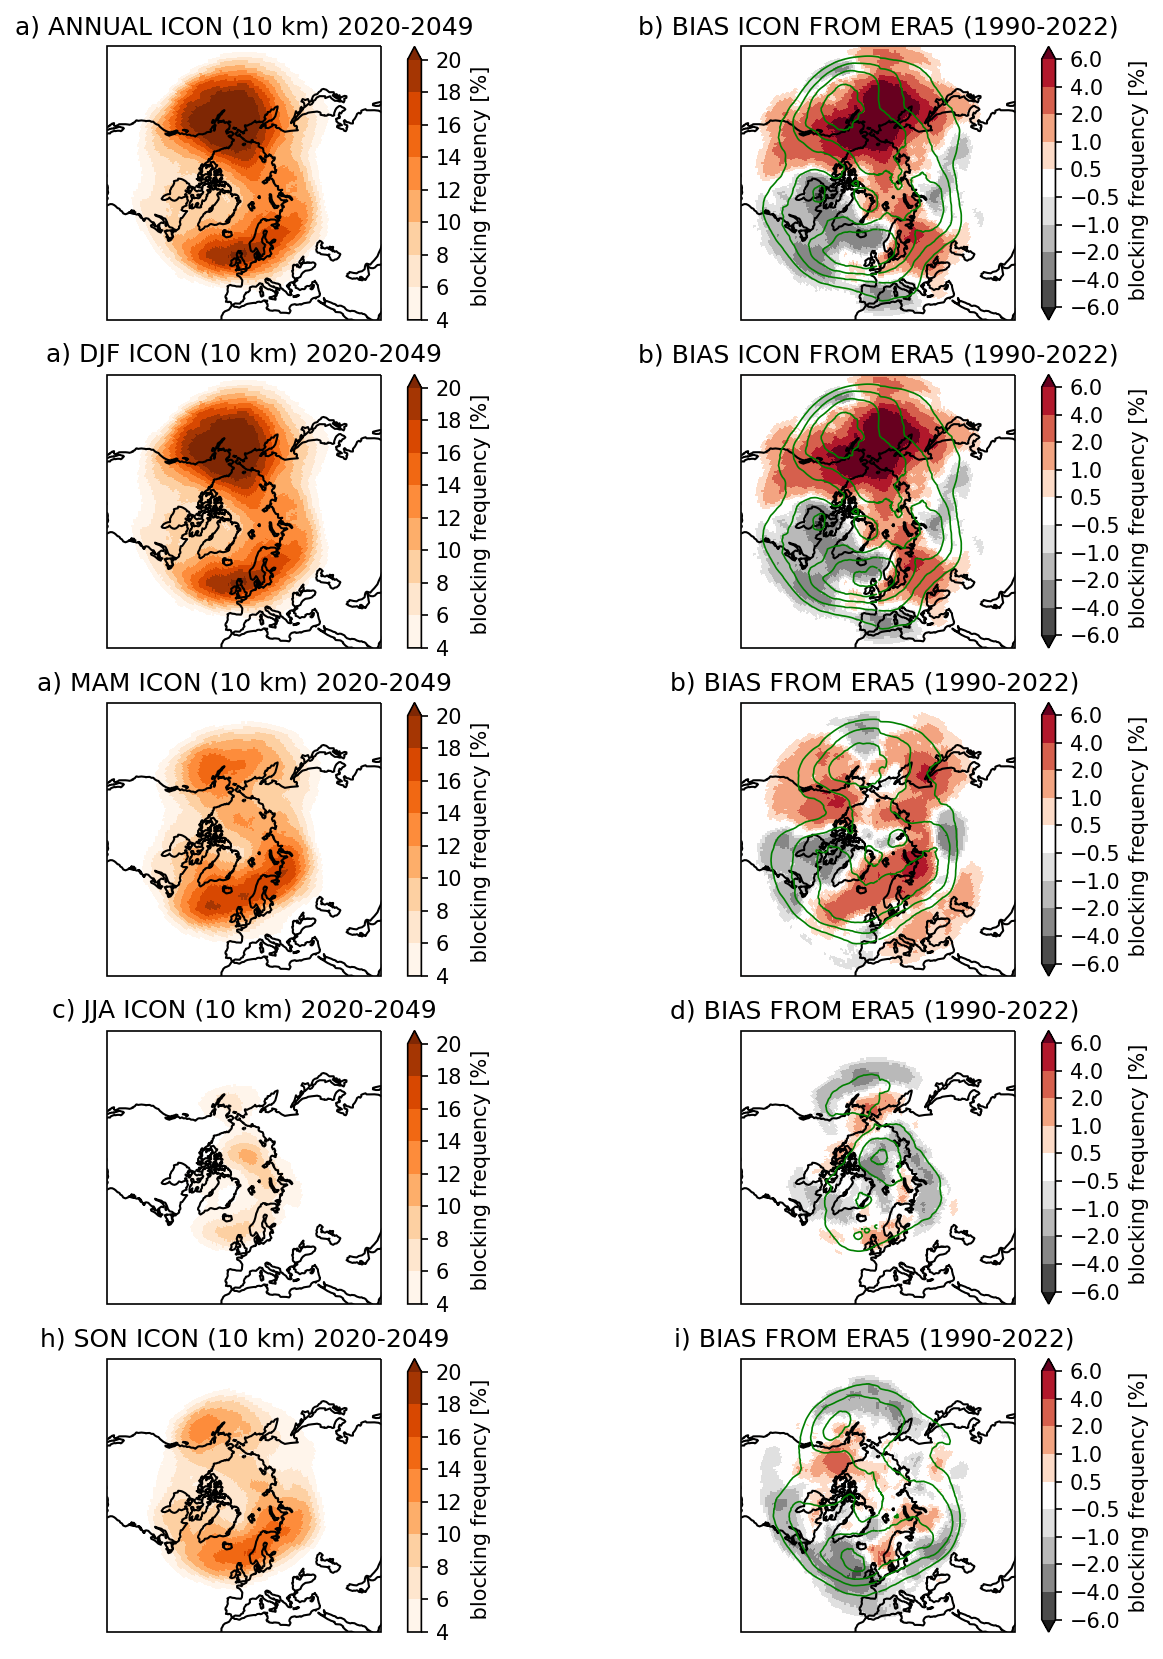

In [23]:
#BIAS model - era5
clevels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6]
mlevels=np.arange(4,22,2)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5, 2, figsize=(10, 14),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im=feq_icon_ngc2013_DJF.flag.plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) ANNUAL ICON (10 km) 2020-2049')

#
###==== second panel
im=bias_icon_DJF.flag.plot(ax=ax2,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF.flag.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b) BIAS FROM ERA5 (1990-2022)')

####==== third panel
im=feq_icon_ngc2013_DJF.flag.plot(ax=ax3,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('a) DJF ICON (10 km) 2020-2049')
#
#####==== fourth panel
im=bias_icon_DJF.flag.plot(ax=ax4,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF.flag.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=np.arange(4,24,4), transform=ccrs.PlateCarree())
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()                                                                                                                                                                                                                                                          
ax4.set_title('b) BIAS FROM ERA5 (1990-2022)')
#
####==== fifth panel
im=feq_icon_ngc2013_MAM.flag.plot(ax=ax5,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('a) MAM ICON (10 km) 2020-2049')
#
###==== sixth panel
im=bias_icon_MAM.flag.plot(ax=ax6,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM.flag.plot.contour(ax=ax6,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('b) BIAS FROM ERA5 (1990-2022) ')
#
####==== seveth panel
im=feq_icon_ngc2013_JJA.flag.plot(ax=ax7,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax7.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('c) JJA ICON (10 km) 2020-2049')
#
###==== eight panel
im=bias_icon_JJA.flag.plot(ax=ax8,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA.flag.plot.contour(ax=ax8,colors='g', linewidths=0.8, levels=np.arange(4,24,4), transform=ccrs.PlateCarree())
ax8.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('d) BIAS FROM ERA5 (1990-2022) ')
#
####==== niht panel
im=feq_icon_ngc2013_SON.flag.plot(ax=ax9,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax9.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax9.coastlines()
ax9.set_title('h) SON ICON (10 km) 2020-2049')
#
###==== tenth panel
im=bias_icon_SON.flag.plot(ax=ax10,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON.flag.plot.contour(ax=ax10,colors='g', linewidths=0.8, levels=np.arange(4,24,4), transform=ccrs.PlateCarree())
ax10.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax10.coastlines()
ax10.set_title('i) BIAS FROM ERA5 (1990-2022) ')


### Save
plt.savefig('bias_blocks_icon-ngc2013_ano.jpg')

# Open during winter for analysing variability

In [5]:
#Load detected blockings with TM2D method
sufix='DJF'

if sufix == 'DJF': 
    ##==ifs block
    full_ifs = xr.open_dataset('/work/bm1235/b382006/regridding/ifs/tco1279-orca025_9km_to_1degree/block/ABS_Z500/BLOCKS-ifs_'+sufix+'.nc')    
    ##==ifs block c3
    full_ifs_c3 = xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/block/ABS_Z500/BLOCKS-ifs_'+sufix+'.nc')    
    ###==icon block ngc2009
    full_icon1 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2009_'+sufix+'.nc')
    ###==icon block ngc2013
    full_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    #feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    ###==icon block ngc2009
    full_icon_c3 = xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/block/ABS_Z500/BLOCKS-icon-ngc3028_'+sufix+'.nc')
    ###==ERA5
    full_era5 = xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5_'+sufix+'.nc')
if sufix == 'MAM': 
    ##==ifs block
    full_ifs = xr.open_dataset('/work/bm1235/b382006/regridding/ifs/tco1279-orca025_9km_to_1degree/block/ABS_Z500/BLOCKS-ifs_'+sufix+'.nc')                          
    ###==icon block ngc2009
    full_icon1 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2009_'+sufix+'.nc')
    ###==icon block ngc2013
    full_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    #feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    ###==ERA5
    full_era5 = xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5_'+sufix+'.nc')
if sufix == 'JJA': 
    ##==ifs block
    full_ifs = xr.open_dataset('/work/bm1235/b382006/regridding/ifs/tco1279-orca025_9km_to_1degree/block/ABS_Z500/BLOCKS-ifs_'+sufix+'.nc')                          
    ###==icon block ngc2009
    full_icon1 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2009_'+sufix+'.nc')
    ###==icon block ngc2013
    full_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    #feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    ###==ERA5
    full_era5 = xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5_'+sufix+'.nc')
if sufix == 'SON': 
    ##==ifs block
    full_ifs = xr.open_dataset('/work/bm1235/b382006/regridding/ifs/tco1279-orca025_9km_to_1degree/block/ABS_Z500/BLOCKS-ifs_'+sufix+'.nc')                          
    ###==icon block ngc2009
    full_icon1 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2009_'+sufix+'.nc')
    ###==icon block ngc2013
    full_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2013_DJF.nc').load()
    #feq_icon_ngc2013_DJF=xr.open_dataset('Feq_BLOCKS-icon-ngc2013_'+sufix+'.nc').load()
    ###==ERA5
    full_era5 = xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5_'+sufix+'.nc')

In [6]:
###==rename ERA5
full_era5=full_era5.rename({'longitude':'lon',
                       'latitude':'lat'
                       })
###===lon to 0 to 359
full_era5['lon']=full_era5['lon']+180
full_era5=full_era5.roll(lon=180)

In [7]:
### accumulate ngc2013
#def set_random_fraction_to_nan(data):
#    data[np.random.rand(*data.shape)<0.94]=np.nan
#    return data
###set 94% of data randomly to nan
#full_icon2_nan = xr.apply_ufunc(set_random_fraction_to_nan,full_icon2_djf,input_core_dims=[['time','lon','lat']],output_core_dims=[['time','lon','lat']], dask='parallelized')
#full_icon2_nan

tim_rdms=np.random.choice(full_icon2.time.size, size=200, replace=False) #randoms timesteps
full_icon2_djf=full_icon2.Blocking[tim_rdms,:,:]

ntime_icon2 = len(full_icon2_djf.time)
acc_icon2 = full_icon2.mean(dim='time')*100

In [8]:
### accumulate ifs
ntime_ifs = len(full_ifs.time)
acc_ifs = full_ifs.Blocking.sum(dim='time')/ntime_ifs*100

### accumulate icon ngc2009
ntime_icon1 = len(full_icon1.time)
acc_icon1 = full_icon1.Blocking.sum(dim='time')/ntime_icon1*100

### accumulate ERA5
###===Full
tmp=full_era5
###===YEASR with ENSO: 
#years=[1990, 1991, 1993, 1994, 1996, 1997, 2001, 2002, 2004, 2006, 2009, 2013, 2015, 2017, 2020] #neutral
##years=[1992, 1995, 1998, 2003, 2007, 2010, 2016] #nino
###years=[1999, 2000, 2008, 2011, 2012, 2021,2022 ] #nina
#tmp=full_era5.isel(time=full_era5.time.dt.year.isin(years))

###====
ntime_era5 = len(tmp.time)
acc_era5 = tmp.Blocking.sum(dim='time')/ntime_era5*100

In [21]:
### accumulate ifs cycle 3
ntime_ifs_c3 = len(full_ifs_c3.time)
acc_ifs_c3 = full_ifs_c3.Blocking.sum(dim='time')/ntime_ifs_c3*100

### accumulate icon  cycle 3
ntime_icon_c3 = len(full_icon_c3.time)
acc_icon_c3 = full_icon_c3.Blocking.sum(dim='time')/ntime_icon_c3*100

In [22]:
##Change C3 coordinates values to be similar to the models C2
new_lon=acc_icon1.lon
new_lat=acc_icon1.lat
acc_ifs_c3_reg=acc_ifs_c3.interp(lon=new_lon,lat=new_lat)

acc_icon_c3_reg=acc_icon_c3.interp(lon=new_lon,lat=new_lat)
acc_icon_c3_reg

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [23]:
##Change ERA coordinates values to be similar to the models
new_lon=acc_icon1.lon
new_lat=acc_icon1.lat
acc_era5_reg=acc_era5.interp(lon=new_lon,lat=new_lat)
#acc_era5_reg

In [24]:
##compute bias
bias_ifs = acc_ifs - acc_era5_reg
bias_ifs_c3 = acc_ifs_c3_reg - acc_era5_reg
bias_icon1 = acc_icon1 - acc_era5_reg
bias_icon2 =  acc_icon2 - acc_era5_reg
bias_icon_c3 = acc_icon_c3_reg - acc_era5_reg
bias_icon_c3

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

### Compute range (max,min) seasonal in ERA5 and compare with each simulation to compare if they are in the ERA5 variability

In [25]:
###assign group by year
byear_full_era5=tmp.groupby('time.year').mean(dim='time')*100
#byear_full_era5

In [26]:
###interpolate era5 group yearly
byear_era5_reg = byear_full_era5.interp(lon=new_lon,lat=new_lat)
#byear_era5_reg

In [27]:
###find the range to compare with models
acc_era5_reg_max=byear_era5_reg.max(dim="year") 
acc_era5_reg_min=byear_era5_reg.min(dim="year")

In [28]:
### plot time serie at some point
#byear_era5_reg.Blocking[:,140,0]#.plot()
#acc_era5_reg_max.Blocking[140,0]

### Plotting abs index blocking

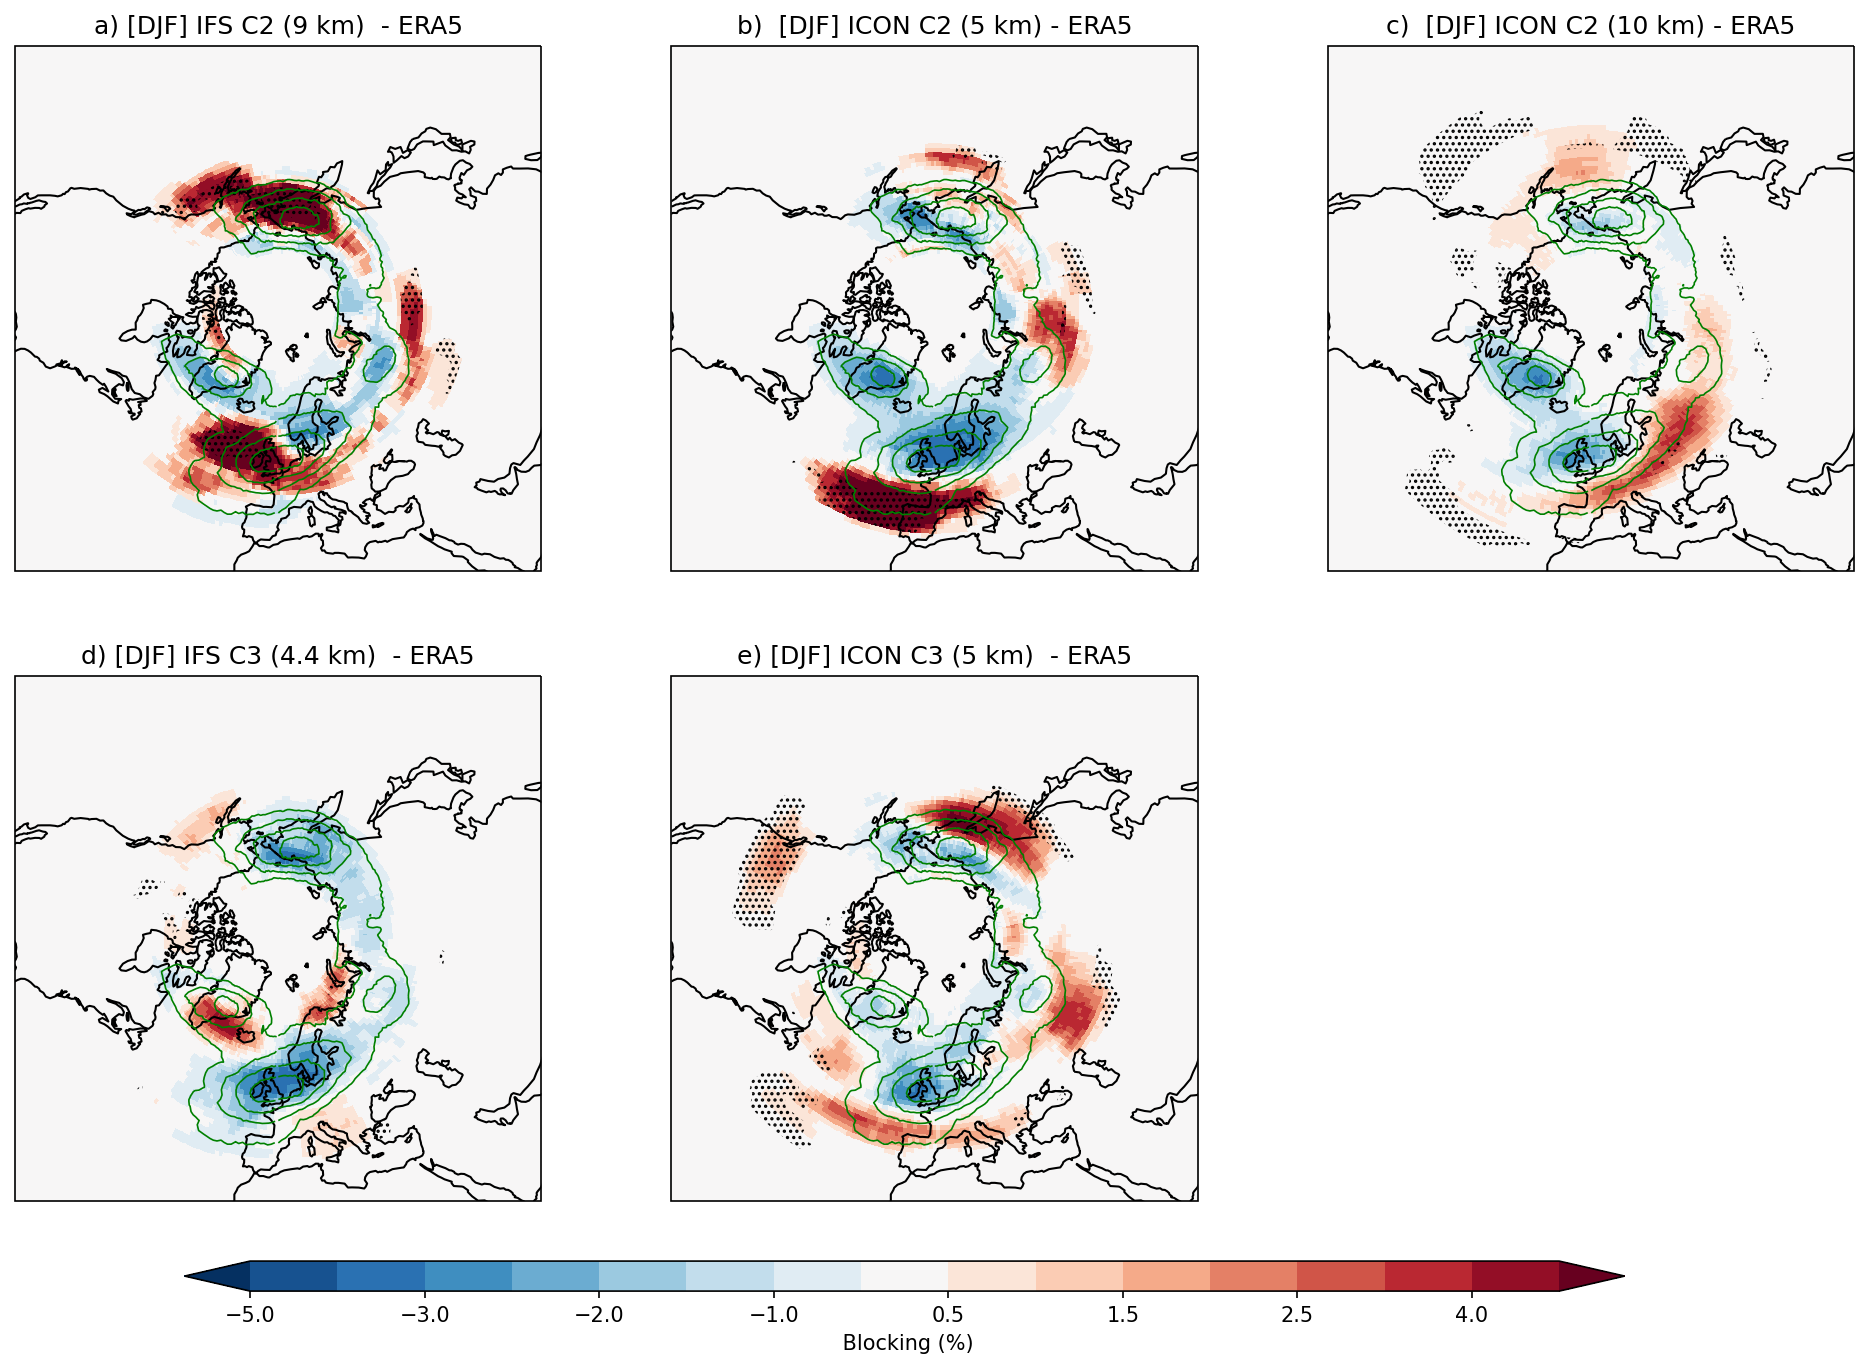

In [38]:
#levels=np.linspace(5100,5800,100)
from mpl_toolkits.axes_grid1 import make_axes_locatable

clevels=[-5,-4,-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3,4,5]
mlevels=np.arange(1,7,1)
### ABS index plot in DJF
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(16, 10), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=bias_ifs.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
acc_era5_reg.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.scatter(xp_ifs,yp_ifs,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax1.contourf(
    acc_ifs.lon, acc_ifs.lat, acc_ifs > acc_era5_reg_max.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax1.scatter(xp_ifs2,yp_ifs2,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax1.contourf(
    acc_ifs.lon, acc_ifs.lat, acc_ifs < acc_era5_reg_min.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
ax1.set_title('a) [DJF] IFS C2 (9 km)  - ERA5')


###==== second panel
im2=bias_icon1.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
acc_era5_reg.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
##ax2.scatter(xp_icon1,yp_icon1,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax2.contourf(
    acc_icon1.lon, acc_icon1.lat, acc_icon1 > acc_era5_reg_max.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
##ax1.scatter(xp_ifs2,yp_ifs2,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax2.contourf(
    acc_icon1.lon, acc_icon1.lat, acc_icon1 < acc_era5_reg_min.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();
ax2.set_title('b)  [DJF] ICON C2 (5 km) - ERA5')

###==== third panel
im3=bias_icon2.Blocking.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
acc_era5_reg.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.scatter(xp_icon2,yp_icon2,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax3.contourf(
    acc_icon2.lon, acc_icon2.lat, acc_icon2.Blocking > acc_era5_reg_max.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.contourf(
    acc_icon2.lon, acc_icon2.lat, acc_icon2.Blocking < acc_era5_reg_min.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
ax3.set_title('c)  [DJF] ICON C2 (10 km) - ERA5')

###==== fourth panel
im1=bias_ifs_c3.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
acc_era5_reg.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.scatter(xp_ifs,yp_ifs,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax4.contourf(
    acc_ifs_c3_reg.lon, acc_ifs_c3_reg.lat, acc_ifs_c3_reg > acc_era5_reg_max.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
####ax4.scatter(xp_ifs2,yp_ifs2,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax4.contourf(
    acc_ifs_c3_reg.lon, acc_ifs_c3_reg.lat, acc_ifs_c3_reg < acc_era5_reg_min.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax4.coastlines();
ax4.set_title('d) [DJF] IFS C3 (4.4 km)  - ERA5')

###==== fifth panel
im1=bias_icon_c3.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
acc_era5_reg.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax5.contourf(
    acc_icon_c3_reg.lon, acc_icon_c3_reg.lat, acc_icon_c3_reg > acc_era5_reg_max.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
####ax4.scatter(xp_ifs2,yp_ifs2,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax5.contourf(
    acc_icon_c3_reg.lon, acc_icon_c3_reg.lat, acc_icon_c3_reg < acc_era5_reg_min.Blocking,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax5.coastlines();
ax5.set_title('e) [DJF] ICON C3 (5 km)  - ERA5')

ax6.axis('off')

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im1, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking (%)')

plt.savefig('abs-blocks_'+sufix+'.jpg')

In [163]:
bias_icon1

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## Analsying ANOM blockings

In [2]:
##########################################
#Load detected blockings with ANOM method
#######################################
#ifs
cfull_ifs_djf = xr.open_dataset('/work/bm1235/b382006/regridding/ifs/tco1279-orca025_9km_to_1degree/block/ANO_Z500/BLOCKS-ifs_DJF.nc')

#icon
cfull_icon1_djf = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ANO_Z500/BLOCKS-icon-ngc2009_DJF.nc')
#block_ano_icon = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2009_5km_to_1degree/block/ANO_VAPV/BLOCKS-icon-ngc2009.nc')

#icon ngc2013
#cblock_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/BLOCKS-icon-ngc2013.nc')
cfull_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/BLOCKS-icon-ngc2013_DJF.nc')
#cblock_icon2 = xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/BLOCKS-icon-ngc2013-p3.nc')

###ERA5
cfull_era5_djf=xr.open_dataset('/work/bm1235/b382006/era5/block/ANO_Z500/BLOCKS-era5-ano_DJF.nc')

###==rename
cfull_era5_djf=cfull_era5_djf.rename({'longitude':'lon',
                       'latitude':'lat'
                       })
###===lon to 0 to 359
cfull_era5_djf['lon']=cfull_era5_djf['lon']+180
cfull_era5_djf=cfull_era5_djf.roll(lon=180)

cfull_icon2

<xarray.Dataset>
Dimensions:  (time: 10756, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 ... 2049-12-31T18:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    plev     float64 ...
Data variables:
    flag     (time, lat, lon) int32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed May 10 10:11:38 2023: cdo select,season=DJF BLOCKS-icon...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [3]:
cfull_icon1_djf

<xarray.Dataset>
Dimensions:  (time: 848, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 ... 2022-02-28T18:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    plev     float64 ...
Data variables:
    flag     (time, lat, lon) int32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Mar 12 21:36:58 2023: cdo select,season=DJF BLOCKS-icon...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [4]:
### accumulate ngc2013
#set_random
tim_rdms=np.random.choice(cfull_icon2.time.size, size=800, replace=False)
cfull_icon2_djf=cfull_icon2.flag[tim_rdms,:,:]


cntime_icon2_djf =len(cfull_icon2_djf.time)
cacc_icon2_djf = xr.where(cfull_icon2_djf>1,1,0).sum(dim='time')/cntime_icon2_djf*100
cacc_icon2_djf

<xarray.DataArray 'flag' (lat: 180, lon: 360)>
array([[ 5.5  ,  5.5  ,  5.5  , ...,  5.5  ,  5.5  ,  5.5  ],
       [ 5.875,  5.875,  5.875, ...,  5.875,  5.875,  5.875],
       [ 5.875,  5.875,  5.875, ...,  5.875,  5.75 ,  5.875],
       ...,
       [12.125, 12.25 , 12.125, ..., 11.75 , 12.   , 12.125],
       [12.   , 12.   , 11.875, ..., 12.   , 12.   , 12.   ],
       [12.25 , 12.25 , 12.25 , ..., 12.25 , 12.25 , 12.25 ]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    plev     float64 ...

In [5]:
#Accumulate ifs
cntime_ifs_djf =len(cfull_ifs_djf.time)
cacc_ifs_djf = xr.where(cfull_ifs_djf['flag']>1,1,0).sum(dim='time')/cntime_ifs_djf*100

#Accumulate icon ng2009 (5 km)
cntime_icon1_djf =len(cfull_icon1_djf.time)
cacc_icon1_djf = xr.where(cfull_icon1_djf['flag']>1,1,0).sum(dim='time')/cntime_icon1_djf*100

#Accumulate era5
cntime_era5_djf =len(cfull_era5_djf.time)
cacc_era5_djf = xr.where(cfull_era5_djf['flag']>1,1,0).sum(dim='time')/cntime_era5_djf*100

In [6]:
#len(block_icon2.time)
#cntime_icon2_djf
#len(block_era5.time)
#cntime_era5_djf

In [7]:
##Change ERA coordinates values to be similar to the models
new_lon=cacc_ifs_djf.lon
new_lat=cacc_ifs_djf.lat
cacc_era5_djf_reg = cacc_era5_djf.interp(lon=new_lon,lat=new_lat)
#mean_era5_reg

cbias_ifs_djf = cacc_ifs_djf - cacc_era5_djf_reg
cbias_icon1_djf = cacc_icon1_djf - cacc_era5_djf_reg
cbias_icon2_djf = cacc_icon2_djf - cacc_era5_djf_reg

### Compute range (max,min) seasonal in ERA5 and compare with each simulation to compare if they are in the ERA5 variability

In [8]:
###assign group by year to compute range
### first, labels to 0,1
red_era5=xr.where(cfull_era5_djf['flag']>1,1,0)

byear_full_era5_djf=red_era5.groupby('time.year').mean(dim='time')*100

#byear_full_era5_djf


In [9]:
###interpolate era5 group yearly
byear_era5_djf_reg = byear_full_era5_djf.interp(lon=new_lon,lat=new_lat)
#byear_era5_djf_reg

In [10]:
###find the range to compare with models
acc_era5_djf_reg_max=byear_era5_djf_reg.max(dim="year") 
acc_era5_djf_reg_min=byear_era5_djf_reg.min(dim="year")

In [11]:
#acc_era5_djf_reg_max

In [12]:
### IFS 9KM points outside of era5 variability
#upper= cacc_ifs_djf - acc_era5_djf_reg_max
#
#xPoints =[]
#yPoints =[]
#skip=2
#for x in range (1,len(upper.lon-1),skip):
#    for y in range (1,len(upper.lat-1),skip):
#        if upper[y,x] >0:
#            xPoints.append(upper.lon[x])
#            yPoints.append(upper.lat[y])
#            
#xp_ifs=xPoints
#yp_ifs=yPoints

#lower= cacc_ifs_djf - acc_era5_djf_reg_min
#
#xPoints =[]
#yPoints =[]
#skip=2
#for x in range (1,len(upper.lon-1),skip):
#    for y in range (1,len(upper.lat-1),skip):
#        if lower[y,x]<0:
#            xPoints.append(upper.lon[x])
#            yPoints.append(upper.lat[y])
#            
#xp_ifs_lwr=xPoints
#yp_ifs_lwr=yPoints

### Plotting anoms index blocking

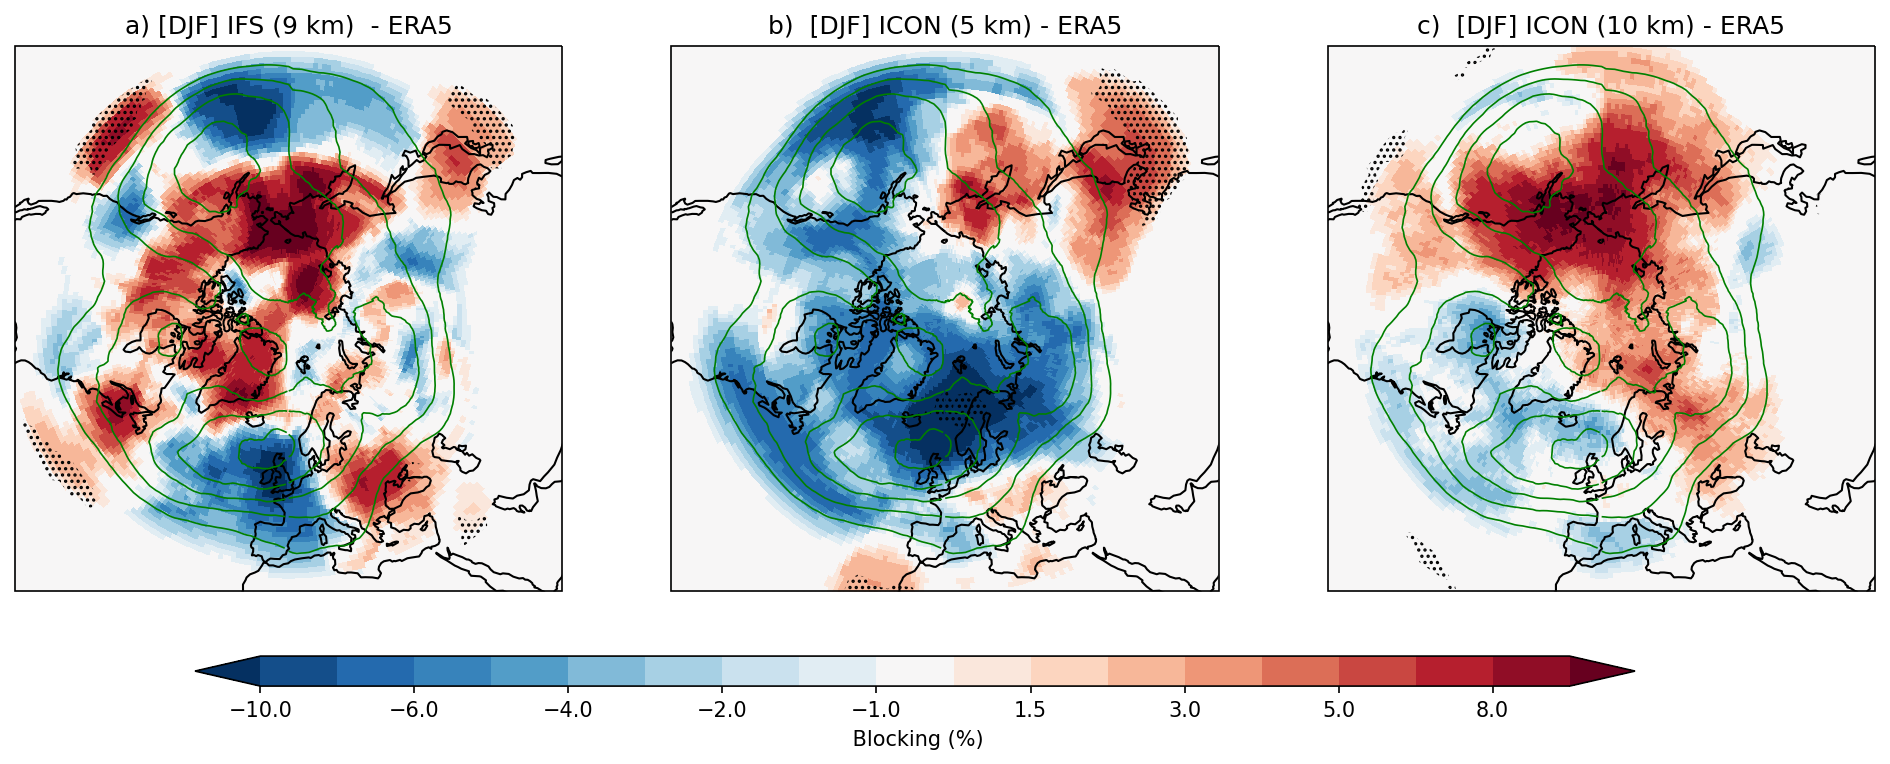

In [13]:
###### ANO Z500 index plot in DJF
sufix='DJF'
clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
mlevels=np.arange(4,24,4)
### ABS index plot in DJF
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16, 10), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=cbias_ifs_djf.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
cacc_era5_djf_reg.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.scatter(xp_ifs,yp_ifs,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax1.contourf(
    cacc_ifs_djf.lon, cacc_ifs_djf.lat, cacc_ifs_djf > acc_era5_djf_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax1.scatter(xp_ifs2,yp_ifs2,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax1.contourf(
    cacc_ifs_djf.lon, cacc_ifs_djf.lat, cacc_ifs_djf < acc_era5_djf_reg_min,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
ax1.set_title('a) [DJF] IFS (9 km)  - ERA5')


###==== second panel
im2=cbias_icon1_djf.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
cacc_era5_djf_reg.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.scatter(xp_icon1,yp_icon1,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax2.contourf(
    cacc_icon1_djf.lon, cacc_icon1_djf.lat, cacc_icon1_djf > acc_era5_djf_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax2.scatter(xp_icon1_lwr,yp_icon1_lwr,s=1, c='r', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax2.contourf(
    cacc_icon1_djf.lon, cacc_icon1_djf.lat, cacc_icon1_djf < acc_era5_djf_reg_min,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();
ax2.set_title('b)  [DJF] ICON (5 km) - ERA5')

###==== third panel
im3=cbias_icon2_djf.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
cacc_era5_djf_reg.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.scatter(xp_icon2,yp_icon2,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
density=4
ax3.contourf(
    cacc_icon2_djf.lon, cacc_icon2_djf.lat, cacc_icon2_djf > acc_era5_djf_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax3.scatter(xp_icon2_lwr,yp_icon2_lwr,s=1, c='k', marker='o', alpha=1, transform=ccrs.PlateCarree(),zorder=2) 
ax3.contourf(
    cacc_icon2_djf.lon, cacc_icon2_djf.lat, cacc_icon2_djf < acc_era5_djf_reg_min,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
ax3.set_title('c)  [DJF] ICON (10 km) - ERA5')

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.25, 0.6, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im2, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking (%)')

plt.savefig('ano-blocks_'+sufix+'.jpg')